<a href="https://colab.research.google.com/github/anfar09/YDP2025/blob/main/Bank_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [35]:
import kagglehub
import os

import numpy as np
import  pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

from xgboost import XGBClassifier

from lightgbm import LGBMClassifier

from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, roc_curve, auc, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import roc_auc_score, f1_score
from sklearn.model_selection import RandomizedSearchCV

In [2]:
# Download latest version
path = kagglehub.dataset_download("radheshyamkollipara/bank-customer-churn")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'bank-customer-churn' dataset.
Path to dataset files: /kaggle/input/bank-customer-churn


In [3]:
# show item in directory of downloaded data
dir_list=os.listdir(path)
print(dir_list)

# create data path
data_path=os.path.join(path,dir_list[0])

# load data into data frame
df=pd.read_csv(data_path)
df.head()

['Customer-Churn-Records.csv']


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   RowNumber           10000 non-null  int64  
 1   CustomerId          10000 non-null  int64  
 2   Surname             10000 non-null  object 
 3   CreditScore         10000 non-null  int64  
 4   Geography           10000 non-null  object 
 5   Gender              10000 non-null  object 
 6   Age                 10000 non-null  int64  
 7   Tenure              10000 non-null  int64  
 8   Balance             10000 non-null  float64
 9   NumOfProducts       10000 non-null  int64  
 10  HasCrCard           10000 non-null  int64  
 11  IsActiveMember      10000 non-null  int64  
 12  EstimatedSalary     10000 non-null  float64
 13  Exited              10000 non-null  int64  
 14  Complain            10000 non-null  int64  
 15  Satisfaction Score  10000 non-null  int64  
 16  Card 

In [5]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited', 'Complain',
       'Satisfaction Score', 'Card Type', 'Point Earned'],
      dtype='object')

In [6]:
df.dtypes

,0
RowNumber,int64
CustomerId,int64
Surname,object
CreditScore,int64
Geography,object
Gender,object
Age,int64
Tenure,int64
Balance,float64
NumOfProducts,int64


In [7]:
df["Card Type"].unique()

array(['DIAMOND', 'GOLD', 'SILVER', 'PLATINUM'], dtype=object)

In [8]:
df["Card Type Map"]=df["Card Type"].map({'DIAMOND':4, 'GOLD':2, 'SILVER':1, 'PLATINUM':3})

df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned,Card Type Map
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464,4
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456,4
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377,4
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350,2
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425,2


In [9]:
df["Geography"].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [10]:
df["Geography Map"]=df["Geography"].map({'France':1, 'Spain':2, 'Germany':3})

df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned,Card Type Map,Geography Map
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464,4,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456,4,2
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377,4,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350,2,1
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425,2,2


In [11]:
df["Gender"].unique()

array(['Female', 'Male'], dtype=object)

In [12]:
df["Gender Map"]=df["Gender"].map({'Female':1, 'Male':2})

df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,...,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned,Card Type Map,Geography Map,Gender Map
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,...,1,101348.88,1,1,2,DIAMOND,464,4,1,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,...,1,112542.58,0,1,3,DIAMOND,456,4,2,1
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,...,0,113931.57,1,1,3,DIAMOND,377,4,1,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,...,0,93826.63,0,0,5,GOLD,350,2,1,1
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,...,1,79084.10,0,0,5,GOLD,425,2,2,1


In [13]:
x = df.drop(["Surname","Card Type","RowNumber","CustomerId","Geography","Gender"],axis=1)

y = df["Exited"]

x.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Point Earned,Card Type Map,Geography Map,Gender Map
0,619,42,2,0.00,1,1,1,101348.88,1,1,2,464,4,1,1
1,608,41,1,83807.86,1,0,1,112542.58,0,1,3,456,4,2,1
2,502,42,8,159660.80,3,1,0,113931.57,1,1,3,377,4,1,1
3,699,39,1,0.00,2,0,0,93826.63,0,0,5,350,2,1,1
4,850,43,2,125510.82,1,1,1,79084.10,0,0,5,425,2,2,1


In [14]:
x.columns

Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited', 'Complain',
       'Satisfaction Score', 'Point Earned', 'Card Type Map', 'Geography Map',
       'Gender Map'],
      dtype='object')

In [15]:
# copy df
df_x = x.copy()

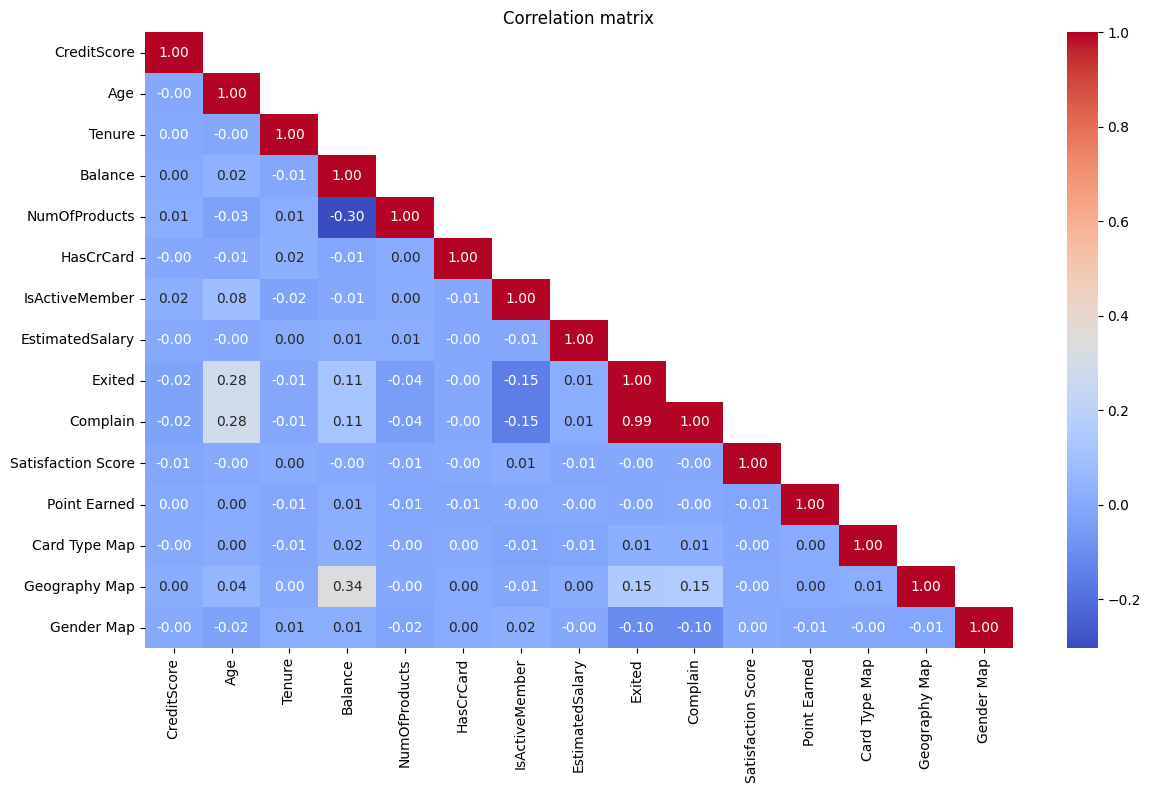

In [16]:
# Correlation Heatmap
plt.figure(figsize=(14,8))

corr_matrix = df_x.corr(numeric_only=True)
annot_matrix = np.trunc(corr_matrix * 100) / 100

mask = np.triu(np.ones_like(corr_matrix, dtype=bool), k=1)

sns.heatmap(corr_matrix, annot=annot_matrix,mask=mask, cmap='coolwarm', fmt=".2f",)
ax = plt.gca()
ax.grid(False)
plt.title("Correlation matrix")
plt.show()

In [17]:
# Correlation
corr = df.corr(numeric_only=True)['Exited'].sort_values(ascending=False)
print(corr)

Exited                1.000000
Complain              0.995693
Age                   0.285296
Geography Map         0.153518
Balance               0.118577
Card Type Map         0.016949
EstimatedSalary       0.012490
Point Earned         -0.004628
Satisfaction Score   -0.005849
CustomerId           -0.006203
HasCrCard            -0.006976
Tenure               -0.013656
RowNumber            -0.016140
CreditScore          -0.026771
NumOfProducts        -0.047611
Gender Map           -0.106267
IsActiveMember       -0.156356
Name: Exited, dtype: float64


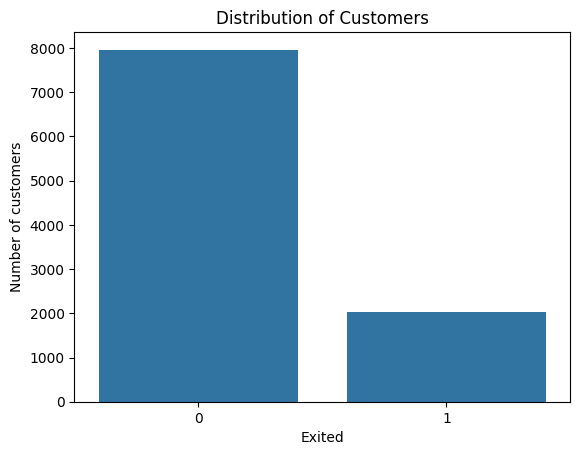

Exited
0    79.62
1    20.38
Name: proportion, dtype: float64


In [18]:
# Target Distribution
sns.countplot(x='Exited', data=df)
plt.title("Distribution of Customers")
plt.xlabel("Exited")
plt.ylabel("Number of customers")
plt.show()

print(round(df['Exited'].value_counts(normalize=True) * 100, 2))

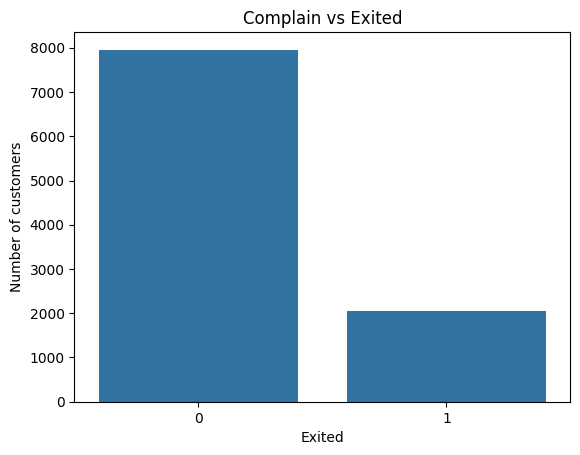

In [19]:
# Complain vs Exited
sns.countplot(x='Complain', data=df)
plt.title("Complain vs Exited")
plt.xlabel("Exited")
plt.ylabel("Number of customers")
plt.show()

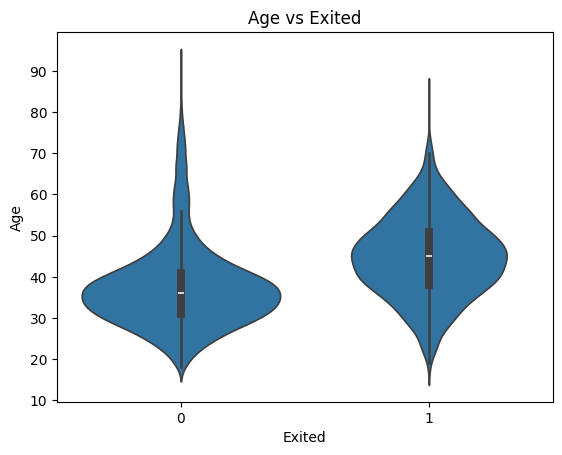

In [20]:
# Age vs Exited
sns.violinplot(x='Exited', y='Age', data=df)
plt.title("Age vs Exited")
plt.show()

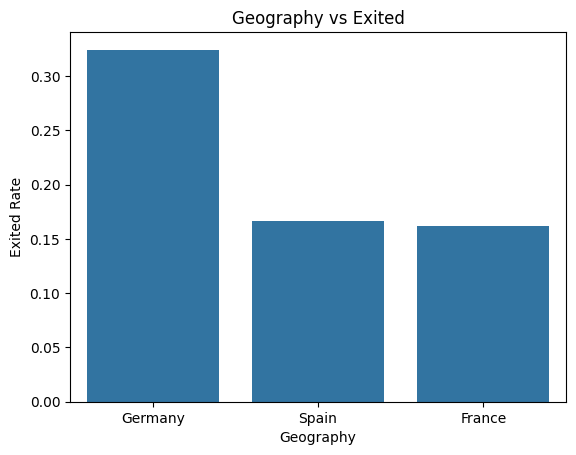

In [21]:
# Geography vs Exited
geo_churn = df.groupby('Geography')['Exited'].mean().sort_values(ascending=False)
sns.barplot(x=geo_churn.index, y=geo_churn.values)
plt.title("Geography vs Exited")
plt.ylabel("Exited Rate")
plt.show()

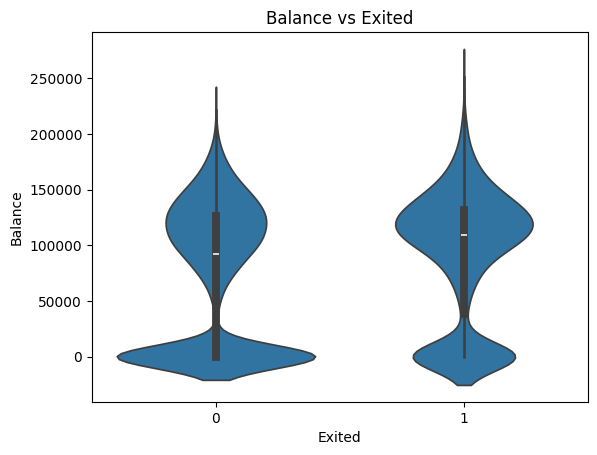

In [22]:
# Balance vs Exited
sns.violinplot(x='Exited', y='Balance', data=df)
plt.title('Balance vs Exited')
plt.show()

In [23]:
(df['Balance']==0).mean() * 100

np.float64(36.17)

In [24]:
x = df.drop(['Exited',"Surname",
             "Card Type","RowNumber",
             "CustomerId","Geography","Gender"], axis=1)
y = df['Exited']

# 80% train, 20% test
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=42, stratify=y
)

In [25]:
x_train.dtypes

,0
CreditScore,int64
Age,int64
Tenure,int64
Balance,float64
NumOfProducts,int64
HasCrCard,int64
IsActiveMember,int64
EstimatedSalary,float64
Complain,int64
Satisfaction Score,int64


In [26]:
# evaluation function

def model_eval(y_test,y_pred,y_pred_prob):
    # Evaluate
    print("\n--- Classification Report ---")
    print(classification_report(y_test, y_pred))

    # Display confusion matrix
    print("\n--- Confusion Matrix ---")
    plt.figure()
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Active","Exited"])
    disp.plot(cmap=plt.cm.Blues)
    ax = plt.gca()
    ax.grid(False)
    plt.show()


    # cal FPR, TPR
    print("\n--- ROC & AUC ---")
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

    # cal AUC
    roc_auc = auc(fpr, tpr)
    print(f"Area Under Curve (AUC): {roc_auc:.4f}")

    # Plot the ROC curve
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.3f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--') # This is the random guess line
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate (FPR)')
    plt.ylabel('True Positive Rate (TPR)')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    plt.show()



--- Cross-validation Report ---
Scores for each of the 10 folds: [0.9975  1.      0.99875 0.99875 0.9975  0.99875 1.      0.99875 0.9975
 0.99875]
Average CV Accuracy: 0.9986
Standard Deviation of CV Accuracy: 0.0009

--- Classification Report ---
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1592
           1       1.00      1.00      1.00       408

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000


--- Confusion Matrix ---


<Figure size 640x480 with 0 Axes>

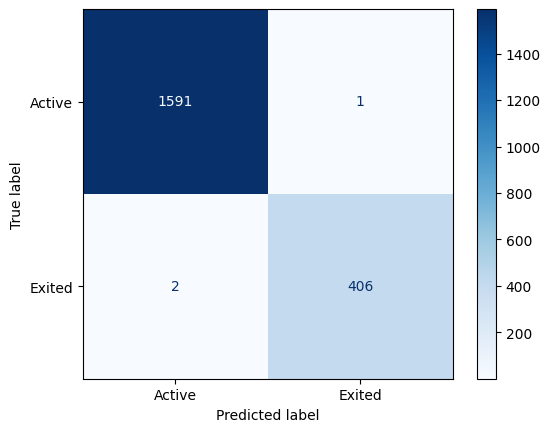


--- ROC & AUC ---
Area Under Curve (AUC): 0.9989


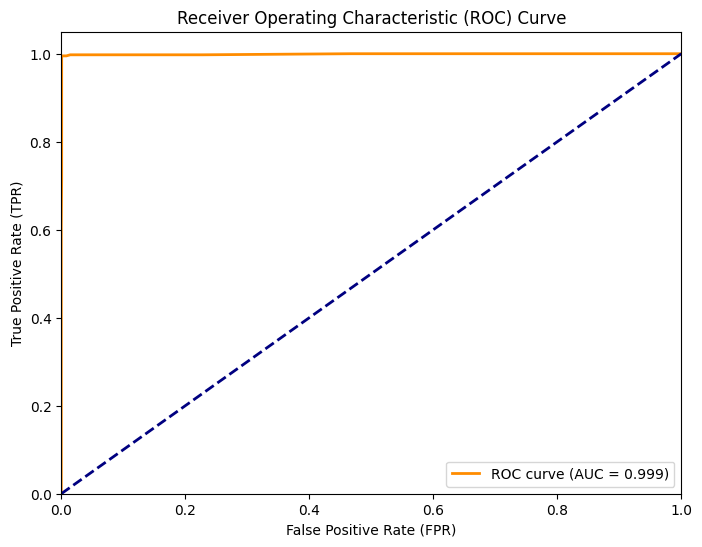

In [27]:
# create model
rf_model_cv = RandomForestClassifier(n_estimators=100,
                                     random_state=42)

n_folds = 10

# cal cross-vaidation score
scores = cross_val_score(rf_model_cv, x_train, y_train,
                         cv=n_folds, scoring='accuracy')

print("--- Cross-validation Report ---")
print(f"Scores for each of the {n_folds} folds: {scores}")
print(f"Average CV Accuracy: {scores.mean():.4f}")
print(f"Standard Deviation of CV Accuracy: {scores.std():.4f}")

# fit model
rf_model_cv.fit(x_train, y_train)

# model evaluation
y_pred_rf = rf_model_cv.predict(x_test)
y_pred_prob_rf = rf_model_cv.predict_proba(x_test)[:, 1]

model_eval(y_test, y_pred_rf, y_pred_prob_rf)

In [28]:
# Create dataframe
rf_errors = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred_rf
})

# Choose error rows
rf_errors = rf_errors[rf_errors['Actual'] != rf_errors['Predicted']]

# Choose input
rf_error_cases = x_test.loc[rf_errors.index]

# Combine data
rf_result = pd.concat([rf_error_cases, rf_errors], axis=1)

# Display
print("wrong prediction cases : ", len(rf_result))
rf_result.head(10)

จำนวนเคสที่ทำนายผิด: 3


,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Complain,Satisfaction Score,Point Earned,Card Type Map,Geography Map,Gender Map,Actual,Predicted
144,691,31,5,40915.55,1,1,0,126213.84,0,2,402,1,1,1,1,0
138,584,48,2,213146.20,1,1,0,75161.25,0,4,814,4,2,1,1,0
9985,659,36,6,123841.49,2,1,0,96833.00,1,5,875,3,1,2,0,1


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [11:48:06] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [11:48:07] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [11:48:07] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [11:48:07] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [11:48:08] WARNING: /w


--- XGBoost CV Report ---
Scores for each fold: [0.9975  1.      0.99875 0.99875 0.9975  0.99875 1.      0.99875 0.9975
 0.99875]
Average CV Accuracy: 0.9986
Std Dev: 0.0009


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [11:48:09] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



--- Classification Report ---
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1592
           1       1.00      1.00      1.00       408

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000


--- Confusion Matrix ---


<Figure size 640x480 with 0 Axes>

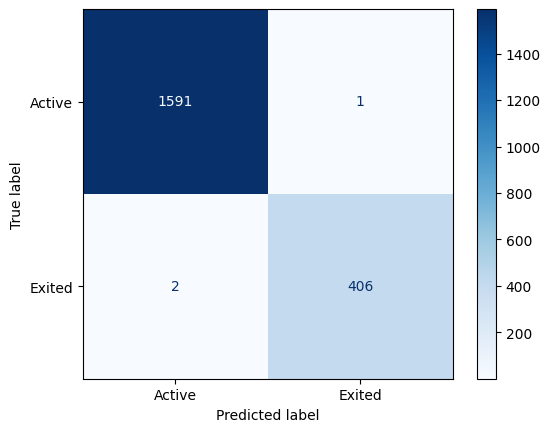


--- ROC & AUC ---
Area Under Curve (AUC): 0.9990


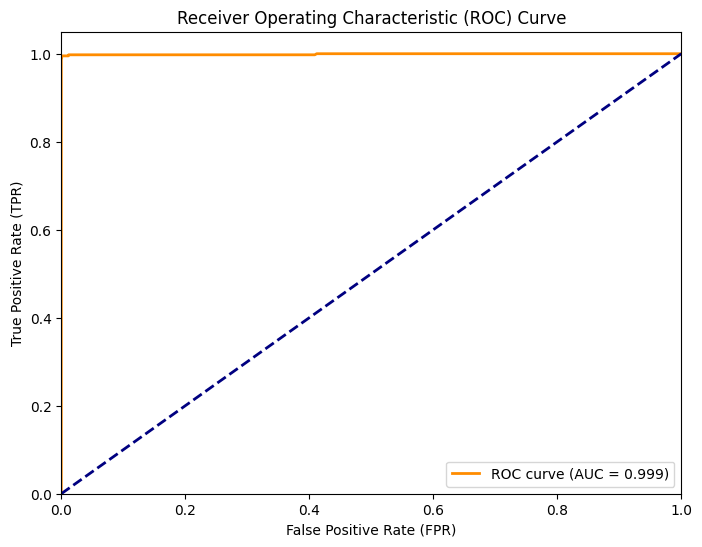

In [29]:
# create model
xgb_model = XGBClassifier(
    subsample=1.0,
    n_estimators=400,
    min_child_weight=3,
    max_depth=3,
    learning_rate=0.01,
    gamma=0.2,
    colsample_bytree=0.8,
    random_state=42,
    use_label_encoder=False,
    eval_metric='auc'
)

# cal cross-validation score
scores = cross_val_score(xgb_model, x_train, y_train,
                         cv=n_folds, scoring='accuracy')
print("\n--- XGBoost CV Report ---")
print(f"Scores for each fold: {scores}")
print(f"Average CV Accuracy: {scores.mean():.4f}")
print(f"Std Dev: {scores.std():.4f}")

# fit model
xgb_model.fit(x_train, y_train)

# model evaluation
y_pred_xgb = xgb_model.predict(x_test)
y_pred_prob_xgb = xgb_model.predict_proba(x_test)[:, 1]

model_eval(y_test, y_pred_xgb, y_pred_prob_xgb)

In [30]:
# create Dataframe
xgb_errors = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred_xgb
})

# choose error rows
xgb_errors = xgb_errors[xgb_errors['Actual'] != xgb_errors['Predicted']]

# choose input
xgb_error_cases = x_test.loc[xgb_errors.index]

# combine data
xgb_result = pd.concat([xgb_error_cases, xgb_errors], axis=1)

# display
print("wrong prediction cases : ", len(xgb_result))
xgb_result.head(10)

จำนวนเคสที่ทำนายผิด: 3


,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Complain,Satisfaction Score,Point Earned,Card Type Map,Geography Map,Gender Map,Actual,Predicted
144,691,31,5,40915.55,1,1,0,126213.84,0,2,402,1,1,1,1,0
138,584,48,2,213146.20,1,1,0,75161.25,0,4,814,4,2,1,1,0
9985,659,36,6,123841.49,2,1,0,96833.00,1,5,875,3,1,2,0,1


In [32]:
# choose parameters
params = {
    'max_depth': [3, 4, 5],
    'learning_rate': [0.01, 0.03, 0.05],
    'n_estimators': [200, 400, 600],
    'subsample': [0.7, 0.8, 1.0],
    'colsample_bytree': [0.7, 0.8, 1.0],
    'gamma': [0, 0.1, 0.2],
    'min_child_weight': [1, 2, 3]
}

# create model
xgb = XGBClassifier(
    scale_pos_weight=(y_train.value_counts()[0]/y_train.value_counts()[1]),
    use_label_encoder=False,
    eval_metric='logloss'
)

# random parameters
search = RandomizedSearchCV(xgb, params, cv=5, scoring='roc_auc', n_iter=15, random_state=42)
search.fit(x_train, y_train)

print("Best parameters:", search.best_params_)
print("Best CV AUC:", search.best_score_)

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [11:48:45] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [11:48:46] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [11:48:46] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [11:48:46] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [11:48:47] WARNING: /w

Best parameters: {'subsample': 1.0, 'n_estimators': 400, 'min_child_weight': 3, 'max_depth': 3, 'learning_rate': 0.01, 'gamma': 0.2, 'colsample_bytree': 0.8}
Best CV AUC: 0.999439473760245


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 1467, number of negative: 5733
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001189 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1125
[LightGBM] [Info] Number of data points in the train set: 7200, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.203750 -> initscore=-1.363019
[LightGBM] [Info] Start training from score -1.363019
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best g

<Figure size 640x480 with 0 Axes>

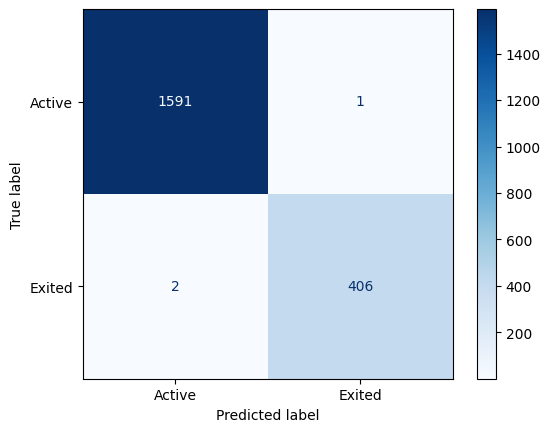


--- ROC & AUC ---
Area Under Curve (AUC): 0.9991


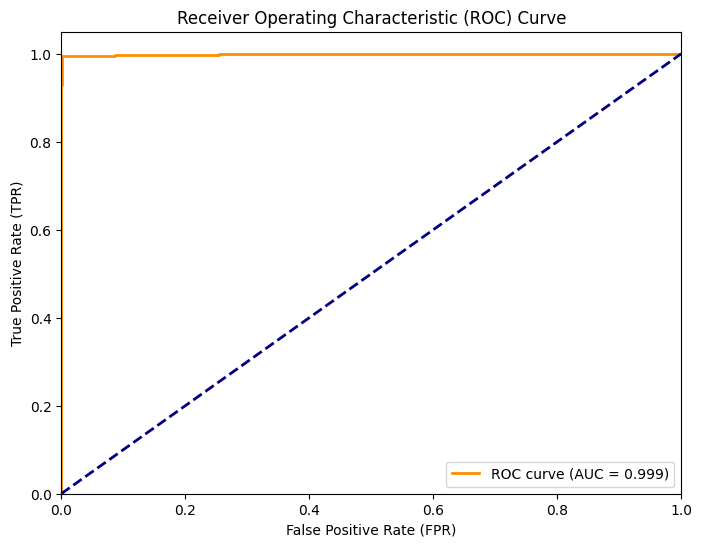

In [37]:
# create model
lgbm_model = LGBMClassifier(
    subsample=0.8,
    reg_lambda=0.2,
    reg_alpha=0.2,
    num_leaves=127,
    n_estimators=100,
    max_depth=7,
    learning_rate=0.1,
    colsample_bytree=0.7,
    random_state=42
)

# cal cross-validation score
scores = cross_val_score(lgbm_model, x_train, y_train,
                         cv=n_folds, scoring='accuracy')
print("\n--- LightGBM CV Report ---")
print(f"Scores for each fold: {scores}")
print(f"Average CV Accuracy: {scores.mean():.4f}")
print(f"Std Dev: {scores.std():.4f}")

# fit model
lgbm_model.fit(x_train, y_train)

# model evaluation
y_pred_lgb = lgbm_model.predict(x_test)
y_pred_prob_lgb = lgbm_model.predict_proba(x_test)[:, 1]

model_eval(y_test, y_pred_lgb, y_pred_prob_lgb)

In [38]:
# create dataframe
lgbm_errors = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred_xgb
})

# choose error rows
lgbm_errors = lgbm_errors[lgbm_errors['Actual'] != lgbm_errors['Predicted']]

# choose input
lgbm_error_cases = x_test.loc[lgbm_errors.index]

# combine data
lgbm_result = pd.concat([lgbm_error_cases, lgbm_errors], axis=1)

# display
print("wrong prediction cases : ", len(lgbm_result))
lgbm_result.head(10)

wrong prediction cases :  3


,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Complain,Satisfaction Score,Point Earned,Card Type Map,Geography Map,Gender Map,Actual,Predicted
144,691,31,5,40915.55,1,1,0,126213.84,0,2,402,1,1,1,1,0
138,584,48,2,213146.20,1,1,0,75161.25,0,4,814,4,2,1,1,0
9985,659,36,6,123841.49,2,1,0,96833.00,1,5,875,3,1,2,0,1


In [ ]:
# choose parameters
lgbm_params = {
    'num_leaves': [15, 31, 63, 127],
    'max_depth': [3, 5, 7, -1],
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [100, 200, 400, 600],
    'subsample': [0.7, 0.8, 1.0],
    'colsample_bytree': [0.7, 0.8, 1.0],
    'reg_alpha': [0, 0.1, 0.2],
    'reg_lambda': [0, 0.1, 0.2]
}

# create model
lgbm = LGBMClassifier(random_state=42)

# random parameters
lgbm_search = RandomizedSearchCV(
    estimator=lgbm,
    param_distributions=lgbm_params,
    n_iter=15,
    scoring='roc_auc',
    cv=5,
    random_state=42,
    n_jobs=-1
)

# fit model
lgbm_search.fit(x_train, y_train)

print("Best parameters (LGBM):", lgbm_search.best_params_)
print("Best CV AUC (LGBM):", lgbm_search.best_score_)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 1630, number of negative: 6370
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000494 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1125
[LightGBM] [Info] Number of data points in the train set: 8000, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.203750 -> initscore=-1.363019
[LightGBM] [Info] Start training from score -1.363019
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best g